In [355]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
import pandoc
import time 
from numpy.linalg import inv
from numpy.linalg import norm 

# Homework 5

### Question 1

In [356]:
def evalF(x): 

    F = np.zeros(2)
    
    F[0] = 3*x[0]**2 - x[1]**2
    F[1] = 3*x[0]*x[1]**2 - x[0]**3 - 1
    return F

def evalJ(x): 

    
    J = np.array([[6*x[0], -2*x[1]], 
        [3*x[1]**2 - 3*x[0]**2, 6*x[0]*x[1]]])
    return J

def Newton(x0,tol,Nmax):

    ''' inputs: x0 = initial guess, tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approx root, ier = error message, its = num its'''

    for its in range(Nmax):
       J = evalJ(x0)
       Jinv = inv(J)
       F = evalF(x0)
       
       x1 = x0 - Jinv.dot(F)
       
       if (norm(x1-x0) < tol):
           xstar = x1
           ier =0
           return[xstar, ier, its]
           
       x0 = x1
    
    xstar = x1
    ier = 1
    return[xstar,ier,its]

In [357]:
def question1(x0, A, tol, nMax):

    i = 0;
    x1 = np.zeros(2); 

    for its in range(100):
        F = evalF(x0)
        x1 = x0 - A.dot(F)
    
        if(norm(x1 - x0) < tol):
            error = 0
            xstar = x1

            return [xstar, error, its]

        x0 = x1

    error = 1
    xstar = x1 
    return [xstar, error, its];

In [358]:
tol = 1e-10
nMax = 1000
x0 = np.array([1, 1])

A = np.array([[1/6, 1/18], 
              [0, 1/6]]);

[xstar, error, its] = question1(x0, A, tol, 100)

print("Using (a) method, x =", xstar[0], "y =", xstar[1])
print("Number of iterations:", its)

Using (a) method, x = 0.500000000040521 y = 0.8660254038535676
Number of iterations: 33


In [359]:
[xstar, error, its] = Newton(x0, tol, nMax)
print("Using Newton's method, x =", xstar[0], "y =", xstar[1])
print("Number of iterations:", its)

Using Newton's method, x = 0.5 y = 0.8660254037844386
Number of iterations: 5


### Question 3

In [360]:
def d(x, y, z):
    return (x**2 + 4*y**2 + 4*z**2 - 16)/(4*x**2 + 64*y**2 + 64*z**2);
def fx(x, y, z):
    return 2*x;
def fy(x,y,z):
    return 8*y;
def fz(x, y, z):
    return 8*z;



def question3(x0, y0, z0, tol, nMax):
    vec0 = np.array([x0, y0, z0]);
    errorVec = np.zeros(0)

    for its in range(nMax):
        x1 = x0 - d(x0, y0, z0)*fx(x0, y0, z0)
        y1 = y0 - d(x0, y0, z0)*fy(x0, y0, z0)
        z1 = z0 - d(x0, y0, z0)*fz(x0, y0, z0)

        vec = np.array([x1, y1, z1]);
        errorVec = np.append(errorVec, norm(vec - vec0))

        if(norm(vec - vec0) < tol):
            error = 0;
            return [vec, error, its, errorVec] ;
    
        x0 = x1
        y0 = y1
        z0 = z1
        vec0 = vec
    
    error = 1;
    return [vec, error, its, errorVec];

Solving for x^2 + 4y^2 + 4z^2 =16
Using the scheme outlined in (a):
 -> x= 1.093642317388195 y= 1.3603283832230444 z= 1.3603283832230444
Number of iterations 4


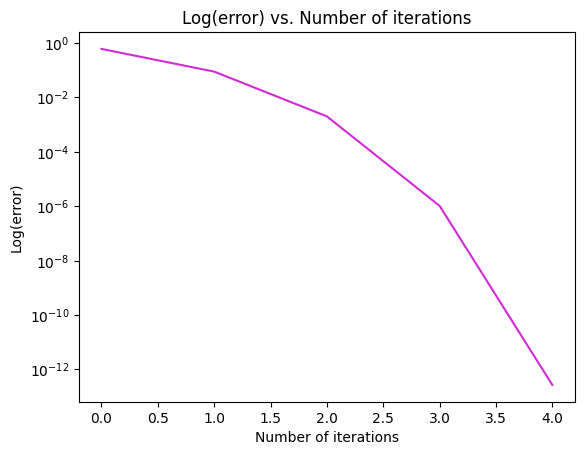

In [361]:
x0 = y0 = z0 = 1
tol = 1e-10
nMax = 100

[vec, error, its, errorVec] = question3(x0, y0, z0, tol, nMax)
print("Solving for x^2 + 4y^2 + 4z^2 =16")
print("Using the scheme outlined in (a):")
print(" -> x=", vec[0], "y=", vec[1], "z=", vec[2])
print("Number of iterations", its)

plt.semilogy(errorVec, c='#d22ad7');
plt.xlabel("Number of iterations");
plt.ylabel("Log(error)");
plt.title("Log(error) vs. Number of iterations");